In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm 

# Import data

Chargement des corrdonnées du museau 

In [9]:
X_head = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/head_coords.csv",  header=None)
X_head


,0,1,2,3
0,0.171130,0.391502,0.516889,0.663207
1,0.172891,0.411942,0.520052,0.637912
2,0.174267,0.428778,0.522600,0.617213
3,0.175295,0.442282,0.524578,0.600754
4,0.176014,0.452724,0.526035,0.588182
...,...,...,...,...
1370,0.223776,0.727776,0.387667,0.667878
1371,0.218780,0.710023,0.390090,0.669977
1372,0.216704,0.692295,0.391427,0.670888
1373,0.217767,0.674704,0.391580,0.670472


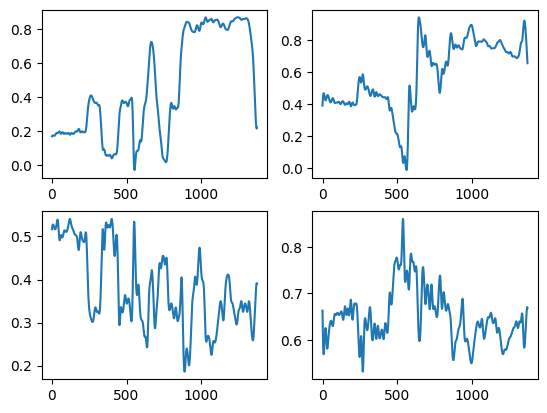

In [10]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X_head)) , X_head[0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X_head)) ,X_head[1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X_head)) ,X_head[2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X_head)) ,X_head[3])


# Train model

In [15]:
scores = list()
models = list()
for n_components in range(2, 5): # test 2 to 5 n components
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        # covariance = tied, full, spherical
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)
        model.fit(X_head)
        models.append(model)
        scores.append(model.score(X_head))
        # print(f'Converged: {model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and 'f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
Z = model.predict(X_head)

Model is not converging.  Current: 6121.7432634061215 is not greater than 6121.743620882379. Delta is -0.0003574762577045476
Model is not converging.  Current: 6292.998310151066 is not greater than 6293.016416002631. Delta is -0.01810585156454181
Model is not converging.  Current: 8796.966405637932 is not greater than 8796.98099533694. Delta is -0.014589699008865864
Model is not converging.  Current: 8446.32389397862 is not greater than 8446.324532227816. Delta is -0.0006382491956173908
Model is not converging.  Current: 9320.112211245058 is not greater than 9320.115124823182. Delta is -0.002913578124207561


The best model had a score of 9333.739826551599 and 4 components


In [16]:
print(model.means_)
print(model.covars_)

[[0.8191884  0.77636528 0.32767281 0.6210182 ]
 [0.15361121 0.42751953 0.50825376 0.63746404]
 [0.28617074 0.21796552 0.37591445 0.73538072]
 [0.30583899 0.5999289  0.33956132 0.67290847]]
[[[ 2.64561965e-03 -1.09321132e-03 -1.19984357e-03 -5.99796298e-04]
  [-1.09321132e-03  2.38331835e-03  1.25387658e-03 -4.42059070e-04]
  [-1.19984357e-03  1.25387658e-03  4.18884672e-03 -1.96762321e-04]
  [-5.99796298e-04 -4.42059070e-04 -1.96762321e-04  1.40889724e-03]]

 [[ 3.46934254e-03 -9.91421126e-04 -3.90258797e-05  8.68492131e-04]
  [-9.91421126e-04  6.31858185e-04  1.33622066e-04 -5.47963546e-04]
  [-3.90258797e-05  1.33622066e-04  4.19930460e-04 -1.36492878e-04]
  [ 8.68492131e-04 -5.47963546e-04 -1.36492878e-04  7.30088572e-04]]

 [[ 1.73540553e-02  7.02662159e-03 -6.63087759e-03  1.49354047e-03]
  [ 7.02662159e-03  2.49219996e-02 -4.61481613e-04 -8.21211349e-03]
  [-6.63087759e-03 -4.61481613e-04  3.67063310e-03 -1.08891088e-03]
  [ 1.49354047e-03 -8.21211349e-03 -1.08891088e-03  4.17231

States:  [1 2 3 0]
1375
0      0.171130
1      0.172891
2      0.174267
3      0.175295
4      0.176014
         ...   
437    0.093369
438    0.101784
439    0.111708
440    0.123270
441    0.136519
Name: 0, Length: 338, dtype: float64
1375
233    0.250159
234    0.260505
235    0.271280
236    0.282274
237    0.293280
         ...   
565    0.074153
566    0.077947
567    0.080810
568    0.082858
569    0.084210
Name: 0, Length: 133, dtype: float64
1375
244     0.355947
245     0.362221
246     0.367949
247     0.373186
248     0.377987
          ...   
1370    0.223776
1371    0.218780
1372    0.216704
1373    0.217767
1374    0.222187
Name: 0, Length: 390, dtype: float64
1375
652     0.627484
653     0.639798
654     0.651646
655     0.662925
656     0.673531
          ...   
1338    0.726397
1339    0.719280
1340    0.711949
1341    0.704356
1342    0.696380
Name: 0, Length: 514, dtype: float64


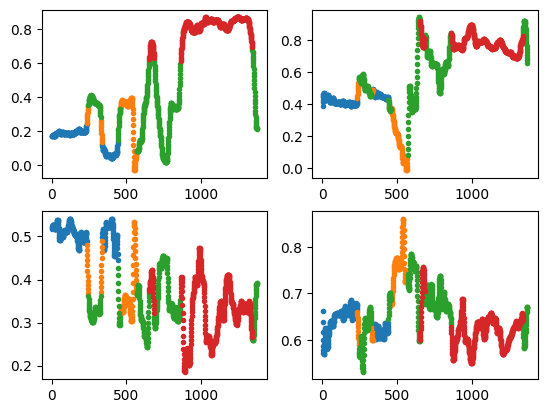

In [19]:
states= pd.unique(Z)
print("States: ",states)
plt.subplot(2,2,1)
for i in states:
    print(len(X_head[0]))
    x = np.linspace(1,1375,1375)[(Z == i)]
    print(X_head[0][(Z == i)])
    y = X_head[0][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,2)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_head[1][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,3)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_head[2][(Z == i)]
    plt.plot(x, y, '.')
plt.subplot(2,2,4)
for i in states:
    x = np.linspace(1,1375,1375)[(Z == i)]
    y = X_head[3][(Z == i)]
    plt.plot(x, y, '.')


In [14]:
df=pd.DataFrame({'states':Z})
# make the same thing for the others 
df.to_csv("E:/UQAM/Recherche/Thomas/data/head_coords_hmmstates.csv")